<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/10_foldCVMixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Data**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
asd_2018_df = pd.read_csv('dataset_2018.csv')

## **Data Preparation**

In [3]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'}, inplace=True)

In [4]:
mixed = asd_2018_df.drop(['Case_No', 'Qchat-10-Score','Who completed the test','Ethnicity'], axis=1)

In [5]:
mixed.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,no,yes,Yes


### **Duplicate samples**

In [6]:
duplicated = mixed[mixed.duplicated()] 

In [7]:
duplicated['Sex'].value_counts()

m    99
f    44
Name: Sex, dtype: int64

In [8]:
no_dup = mixed.drop_duplicates()

In [9]:
no_dup['Sex'].value_counts()

m    636
f    275
Name: Sex, dtype: int64

### **Train-test split**

In [10]:
from sklearn.model_selection import train_test_split

X = mixed.drop("ASD_Traits", axis=1)
y = mixed["ASD_Traits"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
X_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD
806,1,1,0,0,1,1,1,0,1,1,36,m,no,yes
402,1,1,0,1,1,1,1,0,1,0,24,f,no,no
879,1,0,0,0,0,0,0,0,0,1,12,f,no,no
959,0,1,0,0,1,1,1,0,0,0,36,m,no,no
888,0,1,1,0,1,0,0,0,0,0,34,f,yes,no


In [13]:
y_test.head()

806    Yes
402    Yes
879     No
959    Yes
888     No
Name: ASD_Traits, dtype: object

In [14]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD
710,1,0,0,1,0,0,1,0,0,0,27,m,no,no
567,1,1,0,0,1,0,0,1,0,1,36,m,yes,no
594,0,1,1,1,1,1,1,1,1,0,36,m,no,no
46,0,0,0,0,0,0,0,0,0,1,18,m,yes,no
663,1,0,0,0,1,0,1,1,1,0,14,m,yes,no


In [15]:
y_train.head()

710     No
567    Yes
594    Yes
46      No
663    Yes
Name: ASD_Traits, dtype: object

In [16]:
X_nd = no_dup.drop("ASD_Traits", axis=1)
y_nd = no_dup["ASD_Traits"]

X_nd_train, X_nd_test, y_nd_train, y_nd_test = train_test_split(X_nd, y_nd, test_size=0.3, random_state=42, stratify=y_nd)

### **Data pre-processing**

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OrdinalEncoder()
y_encoder = LabelEncoder()
scaler = MinMaxScaler()

age = ['Age_Mons']
char_vals = ['Jaundice','Family_mem_with_ASD','Sex']
target = ['ASD_Traits']

In [18]:
X_train[age] = scaler.fit_transform(X_train[age].values.reshape(-1,1))
X_test[age] = scaler.transform(X_test[age].values.reshape(-1,1))
for c in char_vals:
  X_train[c] = encoder.fit_transform(X_train[c].values.reshape(-1,1))
  X_test[c] = encoder.transform(X_test[c].values.reshape(-1,1))
y_train = y_encoder.fit_transform(y_train.values.ravel())
y_test = y_encoder.transform(y_test.values.ravel())

In [19]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD
710,1,0,0,1,0,0,1,0,0,0,0.625000,1.0,0.0,0.0
567,1,1,0,0,1,0,0,1,0,1,1.000000,1.0,1.0,0.0
594,0,1,1,1,1,1,1,1,1,0,1.000000,1.0,0.0,0.0
46,0,0,0,0,0,0,0,0,0,1,0.250000,1.0,1.0,0.0
663,1,0,0,0,1,0,1,1,1,0,0.083333,1.0,1.0,0.0


In [20]:
X_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD
806,1,1,0,0,1,1,1,0,1,1,1.000000,1.0,0.0,1.0
402,1,1,0,1,1,1,1,0,1,0,0.500000,0.0,0.0,0.0
879,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0.0,0.0
959,0,1,0,0,1,1,1,0,0,0,1.000000,1.0,0.0,0.0
888,0,1,1,0,1,0,0,0,0,0,0.916667,0.0,1.0,0.0


In [21]:
female_indices = X_test['Sex'] == 0.0 
X_test_female = X_test[female_indices]
y_test_female = y_test[female_indices]

In [22]:
X_test_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 402 to 441
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   A1                   105 non-null    int64  
 1   A2                   105 non-null    int64  
 2   A3                   105 non-null    int64  
 3   A4                   105 non-null    int64  
 4   A5                   105 non-null    int64  
 5   A6                   105 non-null    int64  
 6   A7                   105 non-null    int64  
 7   A8                   105 non-null    int64  
 8   A9                   105 non-null    int64  
 9   A10                  105 non-null    int64  
 10  Age_Mons             105 non-null    float64
 11  Sex                  105 non-null    float64
 12  Jaundice             105 non-null    float64
 13  Family_mem_with_ASD  105 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 12.3 KB


In [23]:
X_nd_train[age] = scaler.fit_transform(X_nd_train[age].values.reshape(-1,1))
X_nd_test[age] = scaler.transform(X_nd_test[age].values.reshape(-1,1))
for c in char_vals:
  X_nd_train[c] = encoder.fit_transform(X_nd_train[c].values.reshape(-1,1))
  X_nd_test[c] = encoder.transform(X_nd_test[c].values.reshape(-1,1))
y_nd_train = y_encoder.fit_transform(y_nd_train.values.ravel())
y_nd_test = y_encoder.transform(y_nd_test.values.ravel())

In [24]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

metrics ={'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score, average='binary', pos_label=1),
          'recall': make_scorer(recall_score,average='binary',pos_label=1),
          'specificity': make_scorer(recall_score, average='binary', pos_label=0),
          'f1_score': make_scorer(f1_score,average='binary',pos_label=1)}

### **Evaluation functions**

In [25]:
from sklearn.model_selection import cross_validate

def cross_validation_results(model, predictors, target):
  results = cross_validate(model, predictors, target, scoring = metrics, return_train_score=False, cv=10)

  print("Mean Test Precision: ", results['test_precision'].mean())
  print("Mean Test Recall: ", results['test_recall'].mean())
  print("Mean Test Specificity: ", results['test_specificity'].mean())
  print("Mean Test F1: ", results['test_f1_score'].mean())
  print("Accuracy: ", results['test_accuracy'].mean())
  ConfusionMatrixDisplay.from_estimator(model, predictors, target)

In [26]:
def evaluate_on_test(model, predictors, target):
  predictions = model.predict(predictors)
  print("Accuracy: ", accuracy_score(target, predictions))
  print("Precision: ", precision_score(target, predictions, average='binary', pos_label=1))
  print("Recall: ", recall_score(target, predictions,average='binary', pos_label=1))
  print("Specificity: ", recall_score(target, predictions, average='binary', pos_label=0))
  print("F1: ", f1_score(target, predictions,average='binary', pos_label=1))
  ConfusionMatrixDisplay.from_predictions(target, predictions)

## **Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1.0,random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Mean Test Precision:  1.0
Mean Test Recall:  1.0
Mean Test Specificity:  1.0
Mean Test F1:  1.0
Accuracy:  1.0


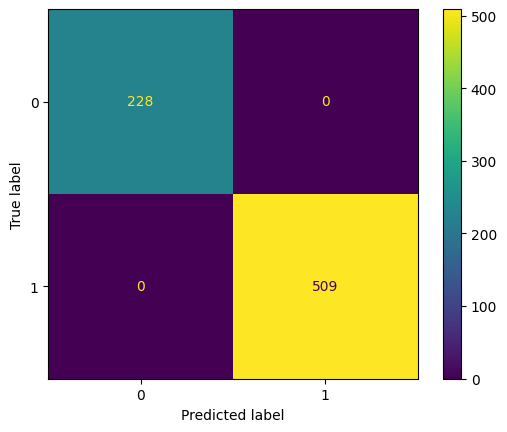

In [28]:
cross_validation_results(log_reg, X_train, y_train)

### **Evaluate on female hold-out set**

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Specificity:  1.0
F1:  1.0


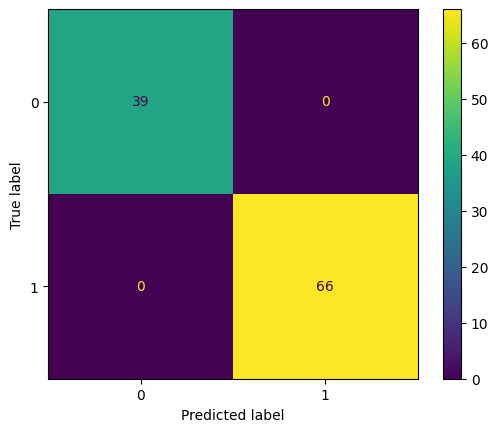

In [29]:
evaluate_on_test(log_reg, X_test_female, y_test_female)

In [30]:
# evaluate_on_test(log_reg, X_test,y_test)

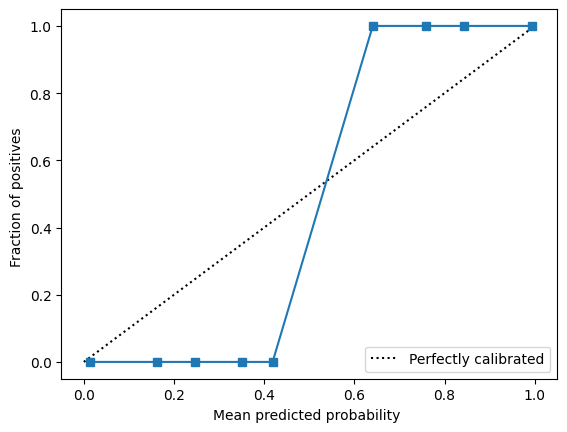

In [31]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

y_prob = log_reg.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()

## **No Duplicates**

In [32]:
nd_lr = LogisticRegression(random_state=42)
nd_lr.fit(X_nd_train, y_nd_train)

LogisticRegression(random_state=42)

Mean Test Precision:  1.0
Mean Test Recall:  1.0
Mean Test Specificity:  1.0
Mean Test F1:  1.0
Accuracy:  1.0


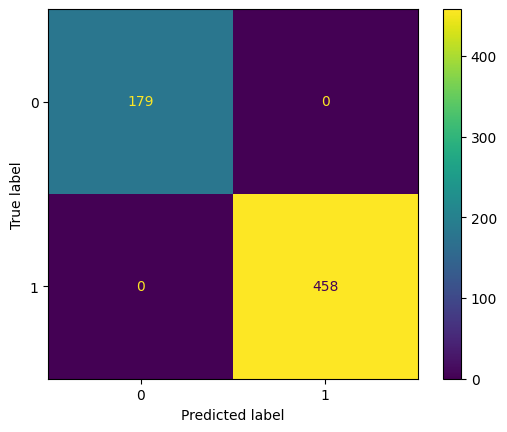

In [33]:
cross_validation_results(nd_lr, X_nd_train, y_nd_train)

In [34]:
# evaluate_on_test(nd_lr, X_nd_test, y_nd_test)

## **AdaBoost**

In [35]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(learning_rate=1.0, n_estimators=50,random_state=42)

ada = ada.fit(X_train, y_train)

Mean Test Precision:  1.0
Mean Test Recall:  1.0
Mean Test Specificity:  1.0
Mean Test F1:  1.0
Accuracy:  1.0


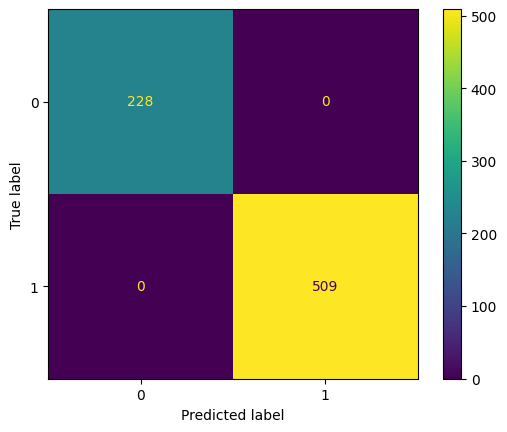

In [36]:
cross_validation_results(ada, X_train, y_train)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Specificity:  1.0
F1:  1.0


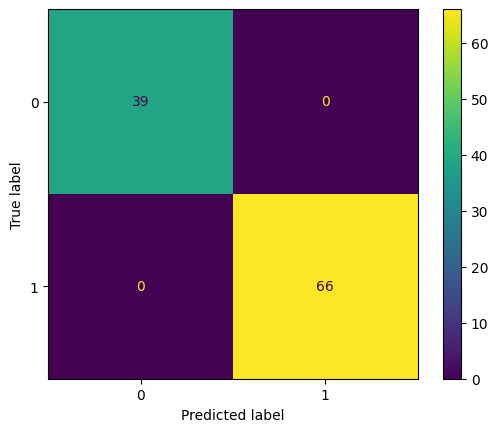

In [37]:
evaluate_on_test(ada, X_test_female, y_test_female)

In [38]:
# evaluate_on_test(ada, X_test, y_test)

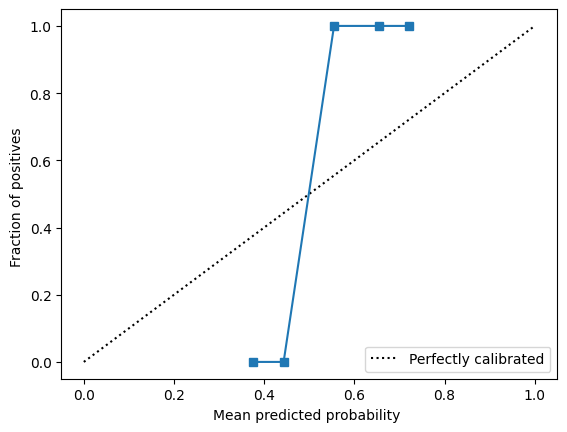

In [39]:
y_prob_ada = ada.predict_proba(X_test)[:, 1]
prob_true_ada, prob_pred_ada = calibration_curve(y_test, y_prob_ada, n_bins=10)
disp_ada = CalibrationDisplay(prob_true_ada, prob_pred_ada, y_prob_ada)
disp_ada.plot()

### **No fine tuning**

In [40]:
ada_nf = AdaBoostClassifier(random_state=42)
ada_nf = ada_nf.fit(X_train,y_train)

Mean Test Precision:  1.0
Mean Test Recall:  1.0
Mean Test Specificity:  1.0
Mean Test F1:  1.0
Accuracy:  1.0


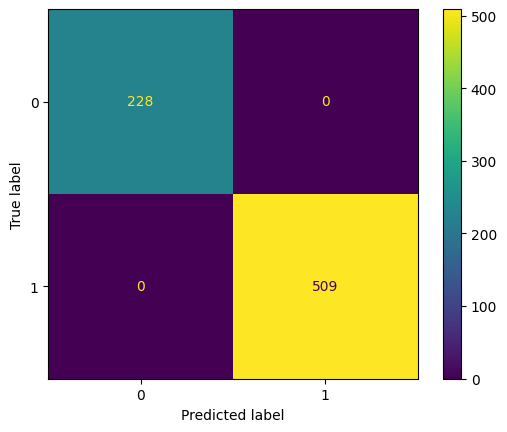

In [41]:
cross_validation_results(ada_nf, X_train, y_train)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Specificity:  1.0
F1:  1.0


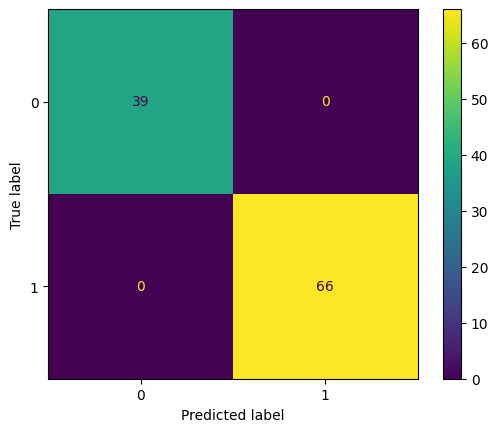

In [42]:
evaluate_on_test(ada_nf, X_test_female, y_test_female)

## **SVC**

In [68]:
from sklearn.svm import SVC

svc = SVC(C=10, gamma=0.1,kernel='rbf', random_state=42,probability=True)

svc = svc.fit(X_train,y_train)

Mean Test Precision:  1.0
Mean Test Recall:  1.0
Mean Test Specificity:  1.0
Mean Test F1:  1.0
Accuracy:  1.0


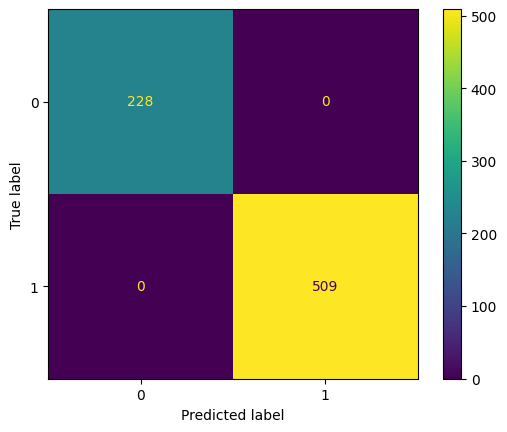

In [69]:
cross_validation_results(svc, X_train, y_train)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Specificity:  1.0
F1:  1.0


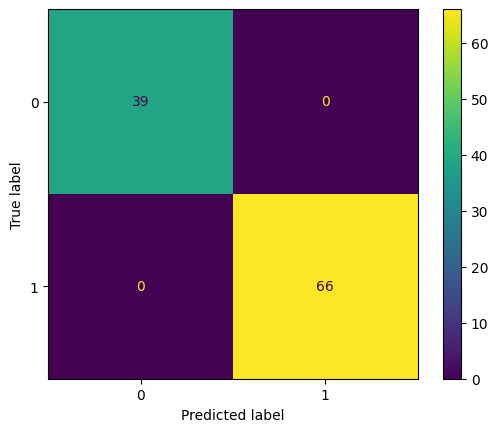

In [70]:
evaluate_on_test(svc, X_test_female, y_test_female)

In [71]:
# evaluate_on_test(svc, X_test, y_test)

### **No fine tuning**

In [72]:
svc_nf = SVC(random_state=42)

svc_nf.fit(X_train, y_train)

SVC(random_state=42)

Mean Test Precision:  0.9809800601421023
Mean Test Recall:  0.994078431372549
Mean Test Specificity:  0.9565217391304348
Mean Test F1:  0.987375489223005
Accuracy:  0.982413920770085


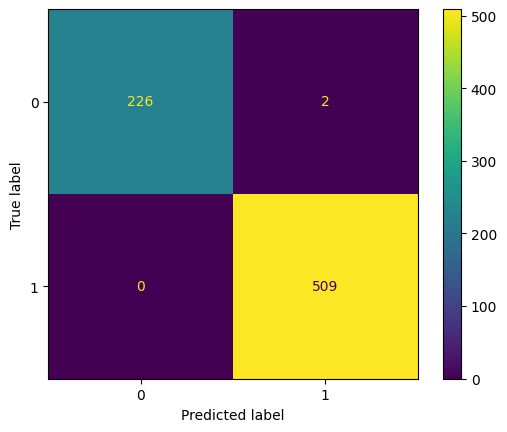

In [73]:
cross_validation_results(svc_nf, X_train, y_train)

In [74]:
# evaluate_on_test(svc_nf, X_test, y_test)

Accuracy:  0.9904761904761905
Precision:  1.0
Recall:  0.9848484848484849
Specificity:  1.0
F1:  0.9923664122137404


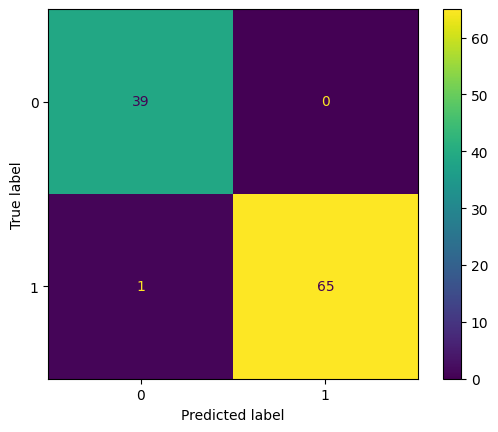

In [75]:
evaluate_on_test(svc_nf, X_test_female, y_test_female)

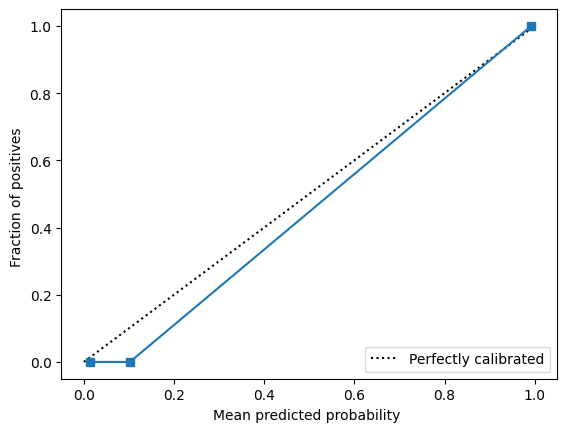

In [76]:
y_prob_svc = svc.predict_proba(X_test)[:, 1]
prob_true_svc, prob_pred_svc = calibration_curve(y_test, y_prob_svc, n_bins=10)
disp_svc = CalibrationDisplay(prob_true_svc, prob_pred_svc, y_prob_svc)
disp_svc.plot()

## **Random Forest**

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=100,random_state=42)


In [78]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Mean Test Precision:  0.9600773594391796
Mean Test Recall:  0.9743921568627452
Mean Test Specificity:  0.908300395256917
Mean Test F1:  0.966938825852554
Accuracy:  0.9539429840799704


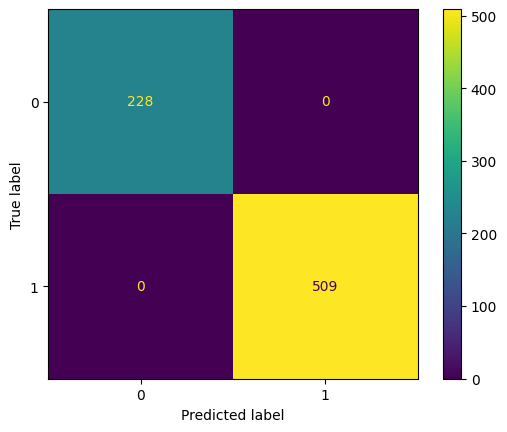

In [79]:
cross_validation_results(rf,X_train,y_train)

Accuracy:  0.9714285714285714
Precision:  0.9846153846153847
Recall:  0.9696969696969697
Specificity:  0.9743589743589743
F1:  0.9770992366412214


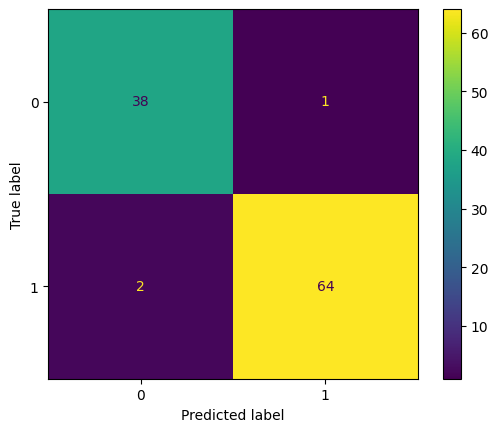

In [80]:
evaluate_on_test(rf,X_test_female,y_test_female)

### **No fine tuning**

In [81]:
rf_nf = RandomForestClassifier(random_state=42)

In [82]:
rf_nf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Mean Test Precision:  0.9600773594391796
Mean Test Recall:  0.9743921568627452
Mean Test Specificity:  0.908300395256917
Mean Test F1:  0.966938825852554
Accuracy:  0.9539429840799704


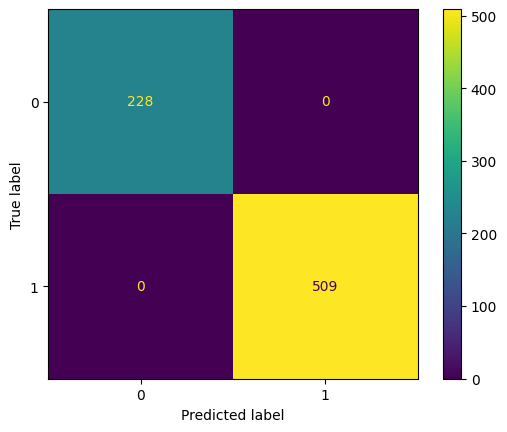

In [83]:
cross_validation_results(rf_nf, X_train, y_train)

Accuracy:  0.9714285714285714
Precision:  0.9846153846153847
Recall:  0.9696969696969697
Specificity:  0.9743589743589743
F1:  0.9770992366412214


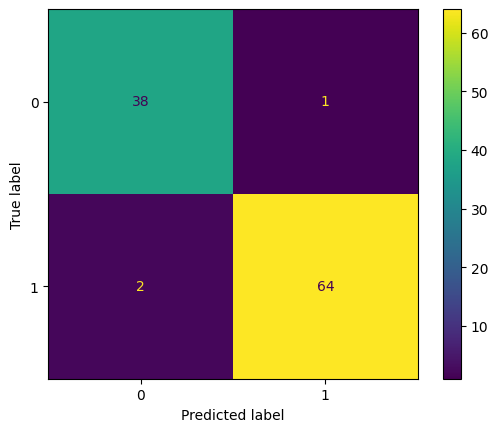

In [84]:
evaluate_on_test(rf_nf,X_test_female, y_test_female)

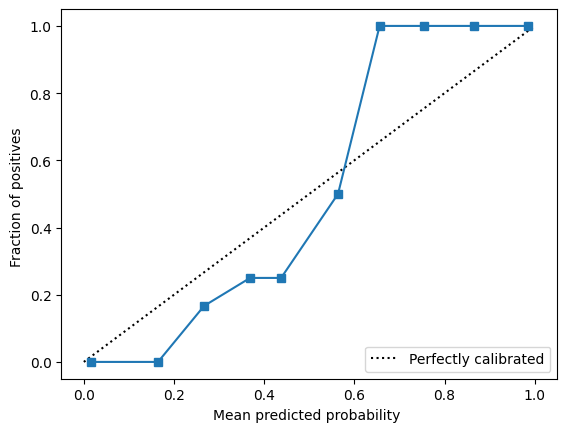

In [93]:
y_prob_rf = rf.predict_proba(X_test)[:, 1]
prob_true_rf, prob_pred_rf = calibration_curve(y_test, y_prob_rf, n_bins=10)
disp_rf = CalibrationDisplay(prob_true_rf, prob_pred_rf, y_prob_rf)
disp_rf.plot()

## **KNN**

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [86]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Mean Test Precision:  0.9656456837929254
Mean Test Recall:  0.9310980392156862
Mean Test Specificity:  0.925691699604743
Mean Test F1:  0.9473340280414175
Accuracy:  0.9295261014439097


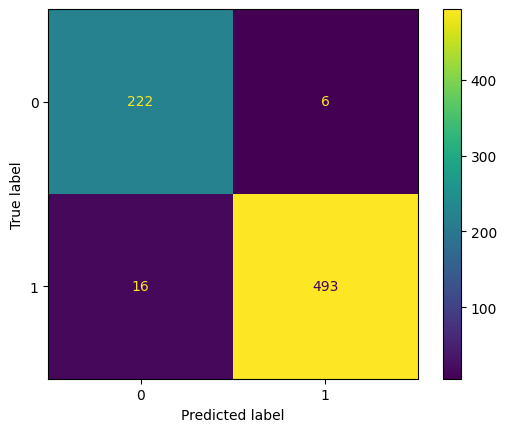

In [87]:
cross_validation_results(knn, X_train, y_train)

Accuracy:  0.9523809523809523
Precision:  0.9841269841269841
Recall:  0.9393939393939394
Specificity:  0.9743589743589743
F1:  0.9612403100775193


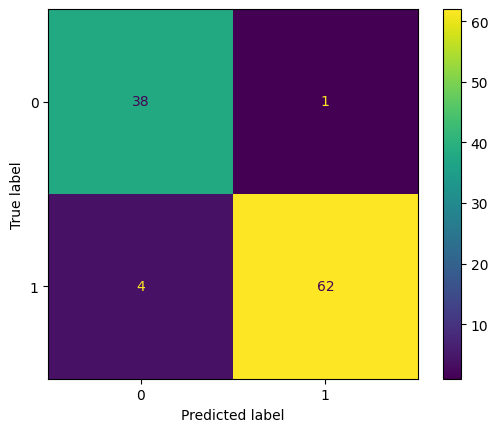

In [88]:
evaluate_on_test(knn, X_test_female, y_test_female)

In [89]:
knn_ft = KNeighborsClassifier(algorithm='brute', n_neighbors = 7, weights ='distance')

In [90]:
knn_ft.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=7, weights='distance')

Mean Test Precision:  0.9801666457584485
Mean Test Recall:  0.9547450980392156
Mean Test Specificity:  0.9563241106719369
Mean Test F1:  0.966954511286036
Accuracy:  0.9552943354313218


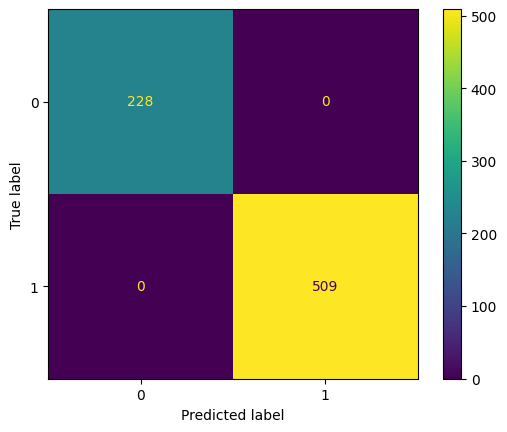

In [91]:
cross_validation_results(knn_ft, X_train, y_train)

Accuracy:  0.9809523809523809
Precision:  1.0
Recall:  0.9696969696969697
Specificity:  1.0
F1:  0.9846153846153847


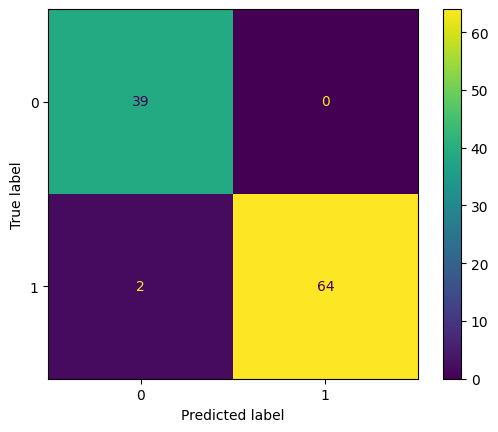

In [92]:
evaluate_on_test(knn_ft, X_test_female,y_test_female)

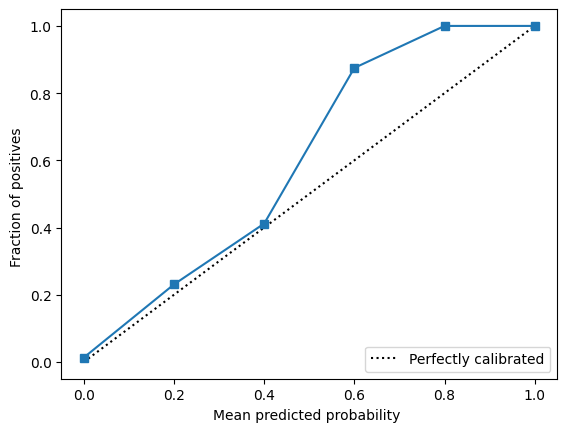

In [94]:
y_prob_knn = knn.predict_proba(X_test)[:, 1]
prob_true_knn, prob_pred_knn = calibration_curve(y_test, y_prob_knn, n_bins=10)
disp_knn = CalibrationDisplay(prob_true_knn, prob_pred_knn, y_prob_knn)
disp_knn.plot()